# Task-3

# Deep Learning Modeling

Deep learning models provides us a strong modeling alternatives for time series. Recurrent Neural Network (RNN) and Long-Short Term Memory (LSTM) are two primary models used in time series modeling. I will start off with the RNN.

### RNN

Let's import the libraries first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#from tensorflow.keras.metrics import AUC
#from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Flatten, Dense
#from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
#import logging
#tf.get_logger().setLevel(logging.ERROR)

As you notice above, I tried to define optimum number of lags in time series models. In RNN and LSTM, this optimum number of lags is defined as `n_steps`, which takes the value of 10.

In [2]:
n_steps = 10
n_features = 1

In order to separate dependent and independent variables, I applied the following code snippet. I picked the `n_steps` as 10, indicating that I have 10 lags.

In [3]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

RNN, similar to LSTM, has a different input structure than the traditional time series models. As input, `sample`, `time steps`, and `number of features` need to be defined. So, we need to create 3-dimensional data as input.

**Samples:** This is the length of the data or observations.

**Time steps:** This is equivalent to the amount of time steps (or `n_steps`) you run your recurrent neural network. You can think of number of lags in model and it is 10 in this model.

**Features:** This is the amount of features in every time step and this is 1 in this case. As a side note: deep learning models allow us to process multivariate structure, which is not possible in traditional time series modeling.

Scaling matters in deep learning and here `MinMaxScaler()` is used and to convert 1-dimensional data into 3-dimensional one, `np.reshape()` is applied. This is applied both for training and test data.

In [4]:
stock_prices = pd.read_csv('stock_prices.csv')
arima_predictions_T = pd.read_csv('arima_predictions_T')
arima_predictions_VZ = pd.read_csv('arima_predictions_VZ')

In [5]:
diff_VZ = stock_prices['VZ'].diff().dropna()
diff_T = stock_prices['T'].diff().dropna()

In [6]:
split = int(len(diff_VZ.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]
diff_train_VZ = diff_VZ.iloc[:split]
diff_test_VZ = diff_VZ.iloc[split:]

In [7]:
X_diff_train_T, y_diff_train_T = split_sequence(diff_train_T, n_steps)
X_diff_train_T = X_diff_train_T.reshape((X_diff_train_T.shape[0],
                                         X_diff_train_T.shape[1], n_features))

X_diff_test_T, y_diff_test_T = split_sequence(diff_test_T.values, n_steps)
X_diff_test_T = X_diff_test_T.reshape((X_diff_test_T.shape[0],
                                       X_diff_test_T.shape[1], n_features))

In the following code block, using python customize functionm I create an RNN structure with one hidden layer with 128 neurons. In addition, `dropout` is included to deal with overfitting.

In [8]:
def RNN_part():
    model = Sequential()
    model.add(SimpleRNN(128,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error', metrics=['mse'])
    return model

In [9]:
RNN_model = RNN_part()
history_RNN = RNN_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 191ms/step - loss: 0.4383 - mse: 0.4383 - val_loss: 0.1378 - val_mse: 0.1378
Epoch 2/200
2/2 [==============================] - 0s 22ms/step - loss: 0.3670 - mse: 0.3670 - val_loss: 0.1230 - val_mse: 0.1230
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 0.3161 - mse: 0.3161 - val_loss: 0.1001 - val_mse: 0.1001
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 0.2969 - mse: 0.2969 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 5/200
2/2 [==============================] - 0s 22ms/step - loss: 0.2644 - mse: 0.2644 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 0.2344 - mse: 0.2344 - val_loss: 0.0776 - val_mse: 0.0776
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 0.2171 - mse: 0.2171 - val_loss: 0.0686 - val_mse: 0.0686
Epoch 8/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1907 - mse: 0.1

Epoch 62/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 1.3224e-04 - val_mse: 1.3224e-04
Epoch 63/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 1.3467e-04 - val_mse: 1.3467e-04
Epoch 64/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 1.2622e-04 - val_mse: 1.2622e-04
Epoch 65/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 2.2370e-04 - val_mse: 2.2370e-04
Epoch 66/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 2.3649e-04 - val_mse: 2.3649e-04
Epoch 67/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 2.0015e-04 - val_mse: 2.0015e-04
Epoch 68/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 1.3434e-04 - val_mse: 1.3434e-04
Epoch 69/200
2/2 [=========

Epoch 121/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 8.7653e-05 - val_mse: 8.7653e-05
Epoch 122/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 7.7233e-05 - val_mse: 7.7233e-05
Epoch 123/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 5.8069e-05 - val_mse: 5.8069e-05
Epoch 124/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.5640e-05 - val_mse: 5.5640e-05
Epoch 125/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 9.0953e-05 - val_mse: 9.0953e-05
Epoch 126/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 1.1159e-04 - val_mse: 1.1159e-04
Epoch 127/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.9995e-05 - val_mse: 8.9995e-05
Epoch 128/200
2/2 [=

2/2 [==============================] - 0s 22ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 1.4689e-04 - val_mse: 1.4689e-04
Epoch 180/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 1.4302e-04 - val_mse: 1.4302e-04
Epoch 181/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 8.9309e-05 - val_mse: 8.9309e-05
Epoch 182/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 1.2763e-04 - val_mse: 1.2763e-04
Epoch 183/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 2.2527e-04 - val_mse: 2.2527e-04
Epoch 184/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 1.1676e-04 - val_mse: 1.1676e-04
Epoch 185/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.4778e-05 - val_mse: 9.4778e-05
Epoch 186/200
2/2 [===============

In [10]:
start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [11]:
predictions_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat)
    T_input = T_input[1:]
    predictions_T.append(yhat)

In [12]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [13]:
print('RMSE of AT&T for RNN model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_T).flatten())))

RMSE of AT&T for RNN model 0.4644


Well, the RMSE score of 0.3254, implying it outperforms the traditional time series models. We know that deep learning model works well with non-linear data. However, please also note that, it is not always the case that deep learning models is superior than the other time series model in terms of performance.

In [14]:
print(history_RNN.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


Let me plot the result of loss and test loss result. It turns out, after huge spike, test loss gets back on track and confirms that RNN performs well. 

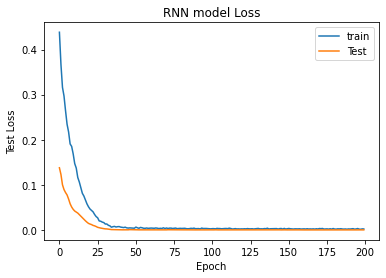

In [15]:
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('RNN model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()

Let me run `callback` function to see the effect of early stopping in deep learning. 
Early stopping is a tool to employ against overfitting in the sense that it helps us to regularize the model.

The other pros of early stopping is to save time, because training a deep learning model takes time. In early stopping, once the model reaches the target performance, the algorithm automatically stops. In other word, thanks to `patience` paramater below, training stops after the number of epochs without improvement.


In [16]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [17]:
RNN_model = RNN_part()
history_RNN = RNN_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2, 
                            callbacks=[callback])

Epoch 1/200
2/2 [==============================] - 1s 164ms/step - loss: 0.4126 - mse: 0.4126 - val_loss: 0.1385 - val_mse: 0.1385


In [18]:
predictions_T = []


for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat)
    T_input = T_input[1:]
    predictions_T.append(yhat)

In [19]:
print('RMSE of AT&T for RNN model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_T).flatten())))

RMSE of AT&T for RNN model 0.4539


In [20]:
X_diff_train_VZ, y_diff_train_VZ = split_sequence(diff_train_VZ, n_steps)
X_diff_train_VZ = X_diff_train_VZ.reshape((X_diff_train_VZ.shape[0],
                                         X_diff_train_VZ.shape[1], n_features))


X_diff_test_VZ, y_diff_test_VZ = split_sequence(diff_test_VZ.values, n_steps)
X_diff_test_VZ = X_diff_test_VZ.reshape((X_diff_test_VZ.shape[0],
                                       X_diff_test_VZ.shape[1], n_features))

In [21]:
def RNN_part():
    model = Sequential()
    model.add(SimpleRNN(64,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error', metrics=['mse'])
    return model

In [22]:
RNN_model = RNN_part()
history_RNN_VZ = RNN_model.fit(X_diff_train_VZ, y_diff_train_VZ,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 160ms/step - loss: 0.6127 - mse: 0.6127 - val_loss: 0.2130 - val_mse: 0.2130
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 0.5945 - mse: 0.5945 - val_loss: 0.2096 - val_mse: 0.2096
Epoch 3/200
2/2 [==============================] - 0s 18ms/step - loss: 0.5293 - mse: 0.5293 - val_loss: 0.1921 - val_mse: 0.1921
Epoch 4/200
2/2 [==============================] - 0s 18ms/step - loss: 0.4959 - mse: 0.4959 - val_loss: 0.1774 - val_mse: 0.1774
Epoch 5/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4559 - mse: 0.4559 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 6/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4196 - mse: 0.4196 - val_loss: 0.1601 - val_mse: 0.1601
Epoch 7/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4072 - mse: 0.4072 - val_loss: 0.1536 - val_mse: 0.1536
Epoch 8/200
2/2 [==============================] - 0s 19ms/step - loss: 0.3902 - mse: 0.3

2/2 [==============================] - 0s 19ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 64/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 7.2262e-04 - val_mse: 7.2262e-04
Epoch 65/200
2/2 [==============================] - 0s 18ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 4.6473e-04 - val_mse: 4.6473e-04
Epoch 66/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 6.3481e-04 - val_mse: 6.3481e-04
Epoch 67/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 5.4318e-04 - val_mse: 5.4318e-04
Epoch 68/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 3.5290e-04 - val_mse: 3.5290e-04
Epoch 69/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 4.4704e-04 - val_mse: 4.4704e-04
Epoch 70/200
2/2 [==============================

Epoch 122/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 5.2341e-04 - val_mse: 5.2341e-04
Epoch 123/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 5.2068e-04 - val_mse: 5.2068e-04
Epoch 124/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 4.7619e-04 - val_mse: 4.7619e-04
Epoch 125/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 4.6424e-04 - val_mse: 4.6424e-04
Epoch 126/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 4.7824e-04 - val_mse: 4.7824e-04
Epoch 127/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 4.3349e-04 - val_mse: 4.3349e-04
Epoch 128/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 4.0094e-04 - val_mse: 4.0094e-04
Epoch 129/200
2/2 [=

2/2 [==============================] - 0s 21ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 2.9452e-04 - val_mse: 2.9452e-04
Epoch 181/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 3.2911e-04 - val_mse: 3.2911e-04
Epoch 182/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 3.3482e-04 - val_mse: 3.3482e-04
Epoch 183/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 2.8163e-04 - val_mse: 2.8163e-04
Epoch 184/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 1.6511e-04 - val_mse: 1.6511e-04
Epoch 185/200
2/2 [==============================] - 0s 18ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 2.0455e-04 - val_mse: 2.0455e-04
Epoch 186/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 2.0439e-04 - val_mse: 2.0439e-04
Epoch 187/200
2/2 [===============

In [23]:
start = X_diff_test_VZ[X_diff_test_VZ.shape[0]-1]
VZ_input = start
VZ_input = VZ_input.reshape((1, n_steps, n_features))

In [24]:
predictions_RNN_VZ = []


for i in range(len(arima_predictions_VZ)):
    VZ_input = VZ_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(VZ_input, verbose=0)
    VZ_input = np.append(VZ_input, yhat)
    VZ_input = VZ_input[1:]
    predictions_RNN_VZ.append(yhat)

In [25]:
print('RMSE of VZ for RNN model {:.4f}'\
      .format(rmse(diff_test_VZ, np.array(predictions_RNN_VZ).flatten())))

RMSE of VZ for RNN model 0.9001


Well, the RMSE score of 0.3254, implying it outperforms the traditional time series models. We know that deep learning model works well with non-linear data. However, please also note that, it is not always the case that deep learning models is superior than the other time series model in terms of performance.

Let me plot the result of loss and test loss result. It turns out, after huge spike, test loss gets back on track and confirms that RNN performs well. 

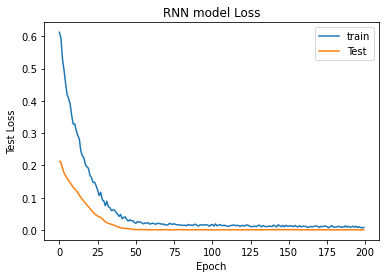

In [26]:
plt.plot(history_RNN_VZ.history['loss'])
plt.plot(history_RNN_VZ.history['val_loss'])
plt.title('RNN model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()

### LSTM

Now, it is time to apply LSTM. Even though the LSTM is built on RNN, it has different structure in the sense that LSTM include forget gates by which we can surpress the past and unrelated information.

Here, I run an LSTM with two hidden layers with 128 and 64 neurons, respectively.

In [27]:
def LSTM_part():
    model = Sequential()
    model.add(LSTM(256,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error',metrics=['mse'])
    return model

In [28]:
LSTM_model = LSTM_part()
history_LSTM = LSTM_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 2s 366ms/step - loss: 0.4053 - mse: 0.4053 - val_loss: 0.0987 - val_mse: 0.0987
Epoch 2/200
2/2 [==============================] - 0s 59ms/step - loss: 0.3901 - mse: 0.3901 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 3/200
2/2 [==============================] - 0s 59ms/step - loss: 0.3782 - mse: 0.3782 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 4/200
2/2 [==============================] - 0s 63ms/step - loss: 0.3694 - mse: 0.3694 - val_loss: 0.1013 - val_mse: 0.1013
Epoch 5/200
2/2 [==============================] - 0s 65ms/step - loss: 0.3617 - mse: 0.3617 - val_loss: 0.1018 - val_mse: 0.1018
Epoch 6/200
2/2 [==============================] - 0s 61ms/step - loss: 0.3541 - mse: 0.3541 - val_loss: 0.1019 - val_mse: 0.1019
Epoch 7/200
2/2 [==============================] - 0s 61ms/step - loss: 0.3438 - mse: 0.3438 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 8/200
2/2 [==============================] - 0s 57ms/step - loss: 0.3377 - mse: 0.3

Epoch 63/200
2/2 [==============================] - 0s 66ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 3.1007e-04 - val_mse: 3.1007e-04
Epoch 64/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 3.1213e-04 - val_mse: 3.1213e-04
Epoch 65/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 7.5400e-04 - val_mse: 7.5400e-04
Epoch 66/200
2/2 [==============================] - 0s 72ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 5.3509e-04 - val_mse: 5.3509e-04
Epoch 67/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 3.1089e-04 - val_mse: 3.1089e-04
Epoch 68/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 8.7840e-04 - val_mse: 8.7840e-04
Epoch 69/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 3.8053e-04 - val_mse: 3.8053e-04
Epoch 70/200
2/2 [=========

Epoch 122/200
2/2 [==============================] - 0s 62ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 2.5590e-04 - val_mse: 2.5590e-04
Epoch 123/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 8.0666e-05 - val_mse: 8.0666e-05
Epoch 124/200
2/2 [==============================] - 0s 66ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 9.5349e-05 - val_mse: 9.5349e-05
Epoch 125/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 1.8570e-04 - val_mse: 1.8570e-04
Epoch 126/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 4.7333e-04 - val_mse: 4.7333e-04
Epoch 127/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 3.6723e-04 - val_mse: 3.6723e-04
Epoch 128/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 1.5084e-04 - val_mse: 1.5084e-04
Epoch 129/200
2/2 [=

2/2 [==============================] - 0s 57ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 7.7924e-05 - val_mse: 7.7924e-05
Epoch 181/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 7.6349e-05 - val_mse: 7.6349e-05
Epoch 182/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 6.7703e-05 - val_mse: 6.7703e-05
Epoch 183/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 1.2256e-04 - val_mse: 1.2256e-04
Epoch 184/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 8.6920e-05 - val_mse: 8.6920e-05
Epoch 185/200
2/2 [==============================] - 0s 60ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 7.0507e-05 - val_mse: 7.0507e-05
Epoch 186/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 1.1563e-04 - val_mse: 1.1563e-04
Epoch 187/200
2/2 [===============

In [29]:
start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [30]:
predictions_LSTM_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat_lstm = LSTM_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat_lstm)
    T_input = T_input[1:]
    predictions_LSTM_T.append(yhat_lstm)

In [31]:
print('RMSE of AT&T for LSTM model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_LSTM_T).flatten())))

RMSE of AT&T for LSTM model 0.4300


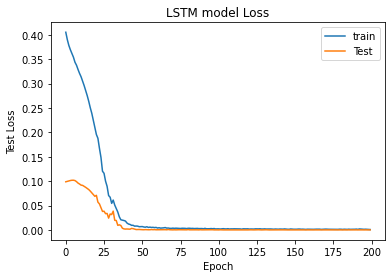

In [32]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('LSTM model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()

Even though the structure of LSTM is different than that of RNN, it shows a very similar performance, indicating that we do not need very complex structure to model this data.

In [33]:
def LSTM_part():
    model = Sequential()
    model.add(LSTM(128,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error',metrics=['mse'])
    return model

In [34]:
LSTM_model = LSTM_part()
history_LSTM_VZ = LSTM_model.fit(X_diff_train_VZ, y_diff_train_VZ,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 2s 441ms/step - loss: 0.6201 - mse: 0.6201 - val_loss: 0.2114 - val_mse: 0.2114
Epoch 2/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6052 - mse: 0.6052 - val_loss: 0.2095 - val_mse: 0.2095
Epoch 3/200
2/2 [==============================] - 0s 36ms/step - loss: 0.5914 - mse: 0.5914 - val_loss: 0.2080 - val_mse: 0.2080
Epoch 4/200
2/2 [==============================] - 0s 35ms/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.2064 - val_mse: 0.2064
Epoch 5/200
2/2 [==============================] - 0s 39ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.2050 - val_mse: 0.2050
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 0.5601 - mse: 0.5601 - val_loss: 0.2028 - val_mse: 0.2028
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 0.5511 - mse: 0.5511 - val_loss: 0.2010 - val_mse: 0.2010
Epoch 8/200
2/2 [==============================] - 0s 35ms/step - loss: 0.5371 - mse: 0.5

2/2 [==============================] - 0s 33ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 64/200
2/2 [==============================] - 0s 44ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 65/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 66/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 67/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 68/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 69/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 70/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0072 - mse: 0.0072 - 

Epoch 123/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 5.6019e-04 - val_mse: 5.6019e-04
Epoch 124/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 4.1266e-04 - val_mse: 4.1266e-04
Epoch 125/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 5.0819e-04 - val_mse: 5.0819e-04
Epoch 126/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 4.6534e-04 - val_mse: 4.6534e-04
Epoch 127/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.7017e-04 - val_mse: 6.7017e-04
Epoch 128/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 4.9842e-04 - val_mse: 4.9842e-04
Epoch 129/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 4.8812e-04 - val_mse: 4.8812e-04
Epoch 130/200
2/2 [=

2/2 [==============================] - 0s 35ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 2.1452e-04 - val_mse: 2.1452e-04
Epoch 182/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 2.2963e-04 - val_mse: 2.2963e-04
Epoch 183/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 2.4428e-04 - val_mse: 2.4428e-04
Epoch 184/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.2427e-04 - val_mse: 4.2427e-04
Epoch 185/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 2.8046e-04 - val_mse: 2.8046e-04
Epoch 186/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 2.9258e-04 - val_mse: 2.9258e-04
Epoch 187/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 2.9893e-04 - val_mse: 2.9893e-04
Epoch 188/200
2/2 [===============

In [35]:
start = X_diff_train_VZ[X_diff_train_VZ.shape[0]-1]
VZ_input = start
VZ_input = VZ_input.reshape((1, n_steps, n_features))

In [36]:
predictions_LSTM_VZ = []

for i in range(len(arima_predictions_VZ)):
    VZ_input = VZ_input.reshape((1, n_steps, n_features))
    yhat_lstm = LSTM_model.predict(VZ_input, verbose=0)
    VZ_input = np.append(T_input, yhat_lstm)
    VZ_input = VZ_input[1:]
    predictions_LSTM_VZ.append(yhat_lstm)

In [37]:
print('RMSE of VZ for LSTM model {:.4f}'\
      .format(rmse(diff_test_VZ, np.array(predictions_LSTM_VZ).flatten())))

RMSE of VZ for LSTM model 0.4723


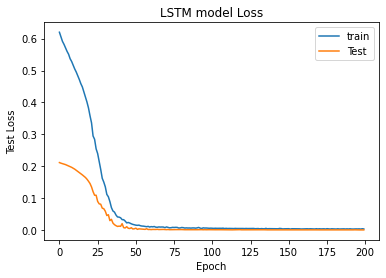

In [38]:
plt.plot(history_LSTM_VZ.history['loss'])
plt.plot(history_LSTM_VZ.history['val_loss'])
plt.title('LSTM model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()